# **Company Customer Churn Analysis**

## **Background**

The data is related to a company where they have various subscription plans based on tenure and provide support calls to customers if they have any issues or if there is any churn. Our goal is to predict the reasons for customer churn (variable y) and analyze the data to increase customer subscriptions.

Dataset can be found in [here](https://www.kaggle.com/datasets/muhammadshahidazeem/customer-churn-dataset).

## **Plan**

The main goal of this project is to predict the reasons behind customer churn in subscriptions using recorded data. This involves optimizing marketing efforts, improving customer engagement strategies, and ultimately boosting subscription numbers. By utilizing historical data for binary classification, the project seeks to accurately identify potential subscribers, understand the causes of churn, and increase customer retention through targeted and informed promotions.

# **Analyze**

### 2.1 Import, Load and Examine 

In [7]:
# Analysis
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Modeling

# Linear Models
from sklearn.linear_model import LogisticRegression # Logistic Reg
# Ensemble Models
from sklearn.ensemble import RandomForestClassifier  # Random Forest
# Boosting Models
from sklearn.ensemble import GradientBoostingClassifier  # GBM
from xgboost import XGBClassifier  # XGBoost
from lightgbm import LGBMClassifier  # LightGBM
# Other Models
from sklearn.tree import DecisionTreeClassifier  # Decision Trees
from sklearn.svm import SVC  # Support Vector Classification
from sklearn.neighbors import KNeighborsClassifier  # K-Nearest Neighbors (KNN)


# Data processing
from sklearn.preprocessing import StandardScaler
from sklearn.calibration import LabelEncoder
from sklearn.model_selection import train_test_split

# Evaluate
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, recall_score, f1_score, \
precision_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, RandomizedSearchCV

from scipy.stats import randint
# setting
import warnings
warnings.filterwarnings("ignore")

sns.set_style("dark")

In [8]:
df = pd.read_csv("customer_churn_dataset-training-master.csv")
df

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.00,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.00,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.00,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
440828,449995.0,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
440829,449996.0,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
440830,449997.0,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
440831,449998.0,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0


In [11]:
df_small = pd.read_csv("customer_churn_dataset-testing-master.csv")
df_small

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...
64369,64370,45,Female,33,12,6,21,Basic,Quarterly,947,14,1
64370,64371,37,Male,6,1,5,22,Standard,Annual,923,9,1
64371,64372,25,Male,39,14,8,30,Premium,Monthly,327,20,1
64372,64373,50,Female,18,19,7,22,Standard,Monthly,540,13,1


In [13]:
print(f'Number of Observations: {df.shape[0]}')
print(f'Number of Features: {df.shape[1]}')

Number of Observations: 440833
Number of Features: 12


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [17]:
df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


### 2.2 Data Cleaning

#### 2.2.1 Missing Values

In [20]:
df.isna().sum()

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [22]:
df_null = df[df.isnull().any(axis=1)]
df_null

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
199295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### From above data we can see that there is only one row which has null values. So, as it is only one row we can delete this row which will not create any impact on data.

In [25]:
df_new = df.dropna()
df_new.isna().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [27]:
df_small = df_small.drop('CustomerID', axis=1)

df_small.isna().sum()

Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

#### Now there are no missing value for both dataset.

### 2.2.2 Outliers

#### We will check outliers by looking at categorical columns: any written or non-related value inside?

### 2.2.2.1 Categorical Columns

In [33]:
# Check category of all columns are objects
columns_object = df_small.select_dtypes("object")

for columns in columns_object:
    print(f"Value counts for {columns}")
    print(df_small[columns].value_counts())
    print("\n")

Value counts for Gender
Gender
Female    34353
Male      30021
Name: count, dtype: int64


Value counts for Subscription Type
Subscription Type
Standard    21502
Basic       21451
Premium     21421
Name: count, dtype: int64


Value counts for Contract Length
Contract Length
Monthly      22130
Annual       21410
Quarterly    20834
Name: count, dtype: int64




#### We can see that no outliers in categorial columns. Lets check with numeric columns

#### 2.2.2.2 Numeric Columns

#### Lets visualize the data distribution with histograms as it is one of the best way for outliers.

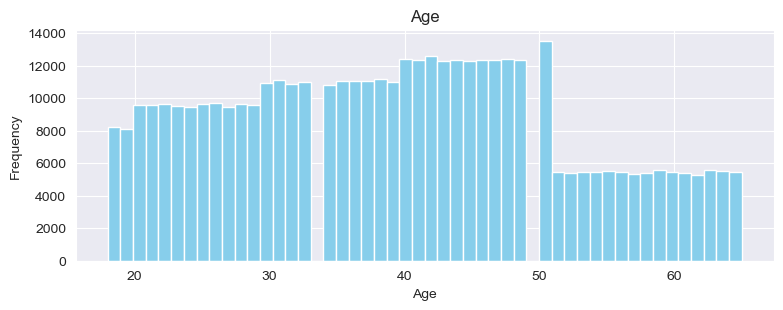

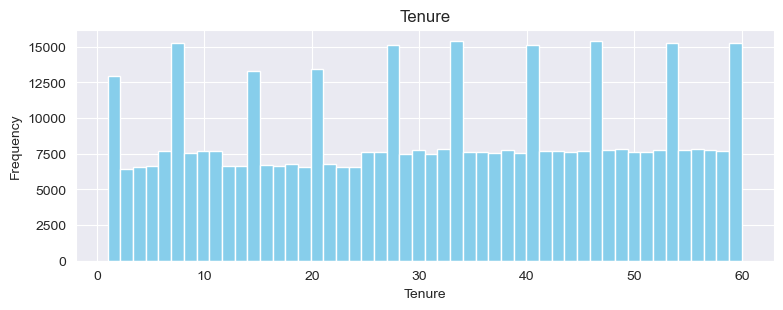

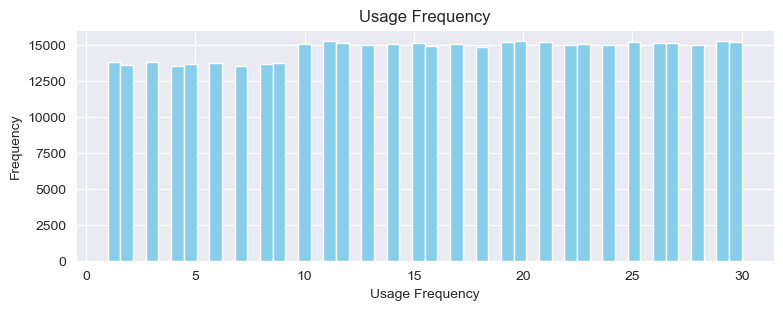

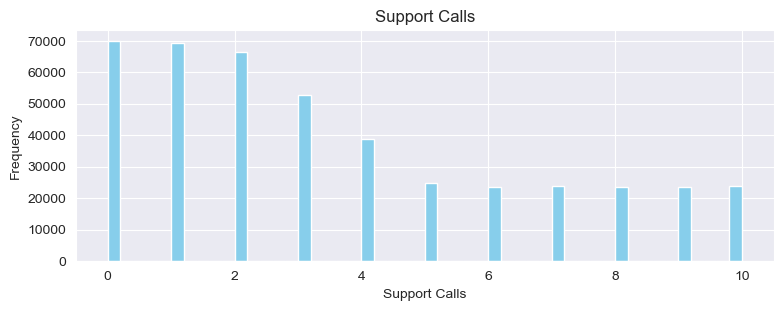

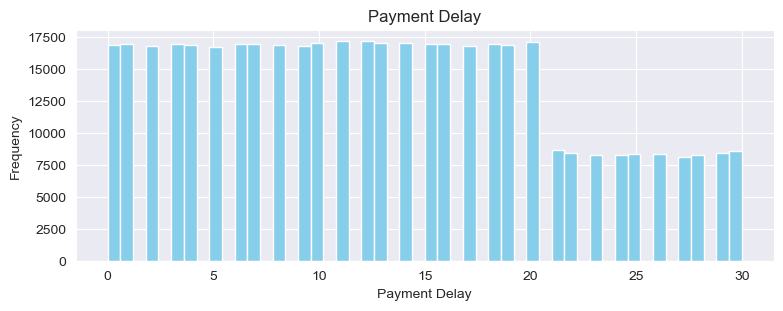

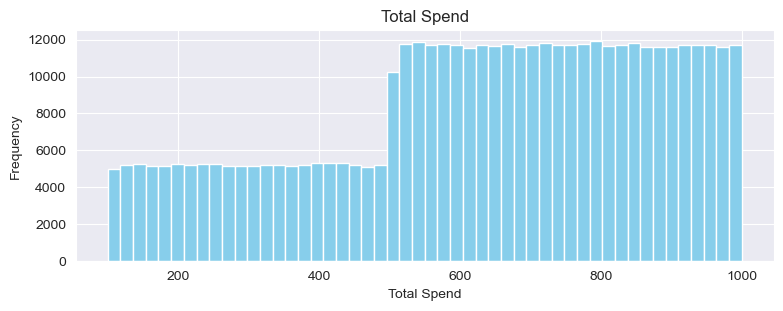

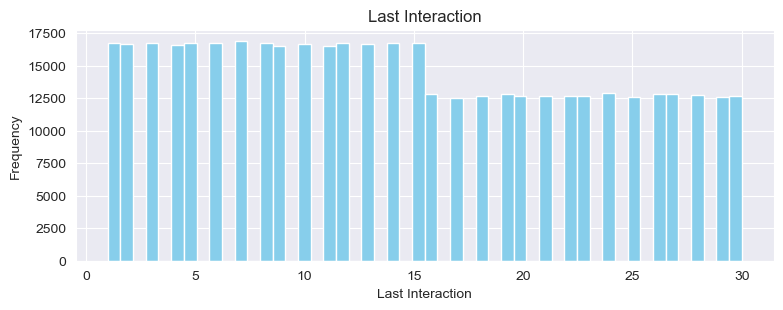

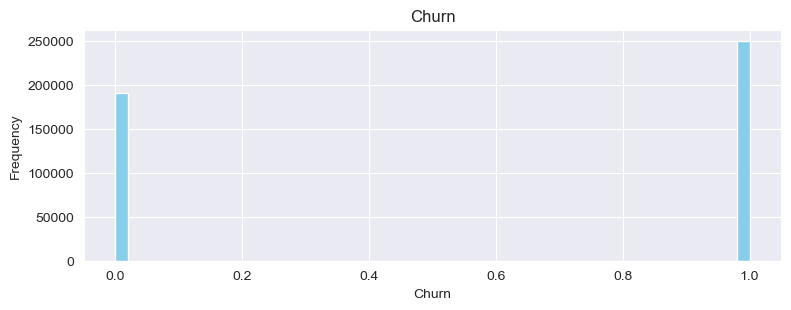

In [38]:
columns_numeric = df_small.select_dtypes("int")

for columns in columns_numeric:
    plt.figure(figsize=(9, 3))
    df[columns].hist(bins=50, color="skyblue")
    plt.title(columns)
    plt.xlabel(columns)
    plt.ylabel("Frequency")
    plt.show()

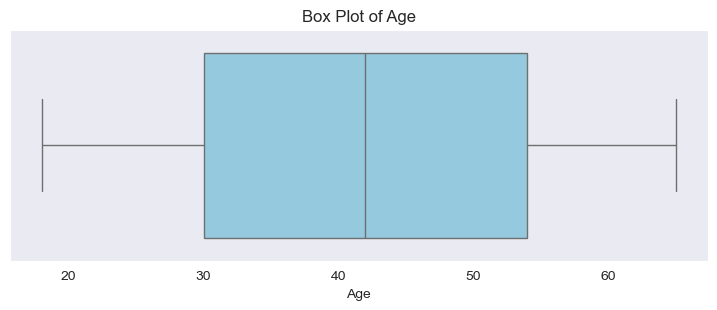

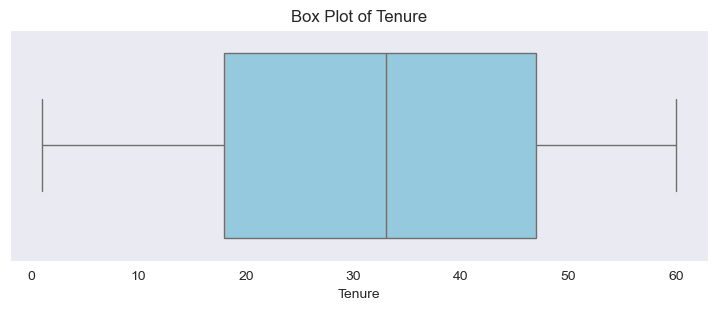

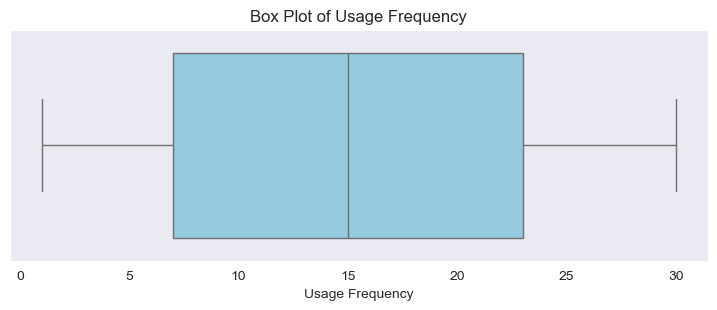

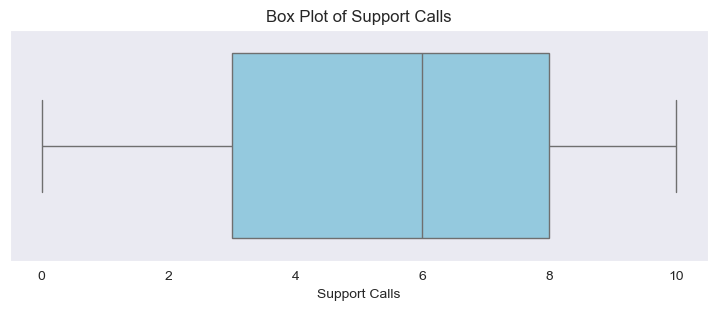

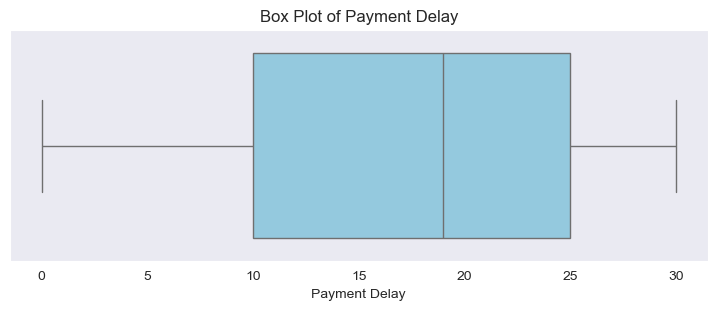

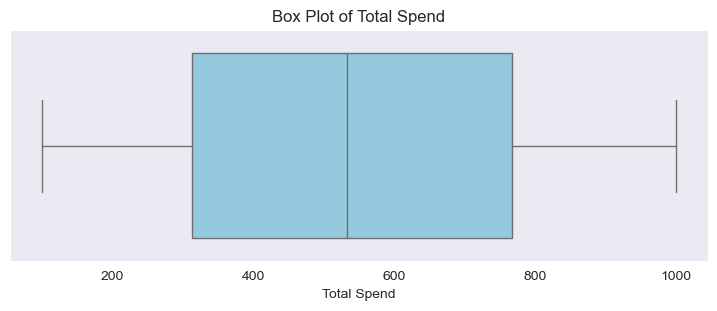

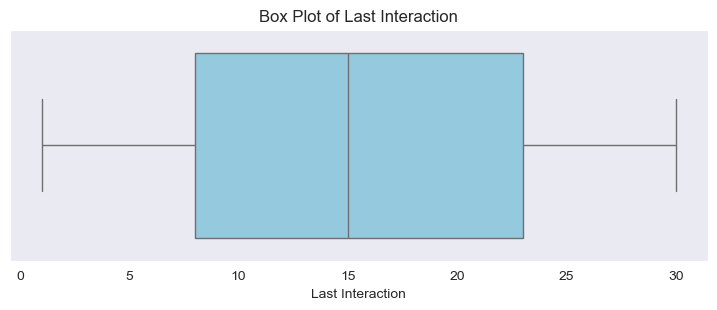

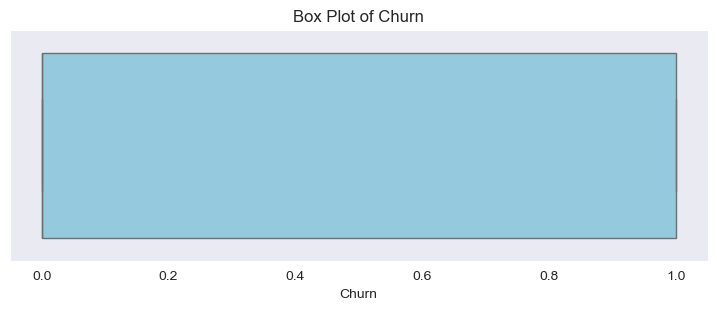

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you want to plot box plots for each numeric column
columns_numeric = df_small.select_dtypes(include="int").columns

for column in columns_numeric:
    plt.figure(figsize=(9, 3))
    sns.boxplot(x=df_small[column], color="skyblue")
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.show()


From the above we can see that all the column's values look normal, and there are no outliers were found in the graph ONLY.

Also, we can clearly know distrubution from each column:
- `age` appears fairly normal but skewed to the left.
- `total spend` appears normal bust skewed to right.
- Almost all the graphs except `total spend` have strong Negative/left-skewed.

But, we need to find some potential outliers in the table apart from  the graphs.

### 2.3.3 Duplicates

In [44]:
df_small.duplicated().sum()

0

There are no duplicates in the data.

# Data Preperation


### 2.3 Exploratory Data Analysis (EDA)

#### 2.3.1 Customer Data

This part of EDA will focus on Customer data.

##### 2.3.1.1 Age vs Total Spend with  Subscription Type

In [52]:
df_small

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,53,Female,58,24,9,2,Standard,Annual,533,18,0
...,...,...,...,...,...,...,...,...,...,...,...
64369,45,Female,33,12,6,21,Basic,Quarterly,947,14,1
64370,37,Male,6,1,5,22,Standard,Annual,923,9,1
64371,25,Male,39,14,8,30,Premium,Monthly,327,20,1
64372,50,Female,18,19,7,22,Standard,Monthly,540,13,1


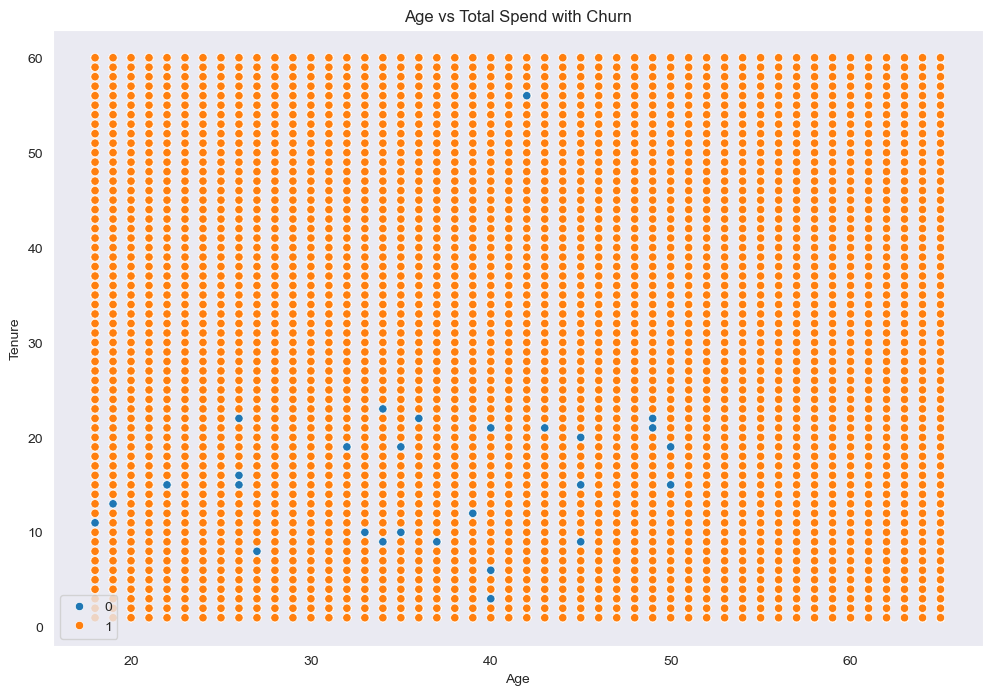

In [54]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x="Age", y="Tenure", hue="Churn", data=df_small)

plt.title("Age vs Total Spend with Churn")
plt.xlabel("Age")
plt.ylabel("Tenure")
plt.legend()
plt.show()

The above scatter plot does not reveal an obvious trend between age and total spend with regard to Churn. However, it suggests that people between age ranges from 20 to 50 have total spend more than 500 are churning more than customers with low total spend.

#### 2.3.1.2  Tenure vs Payment Delay with Respect to Churn

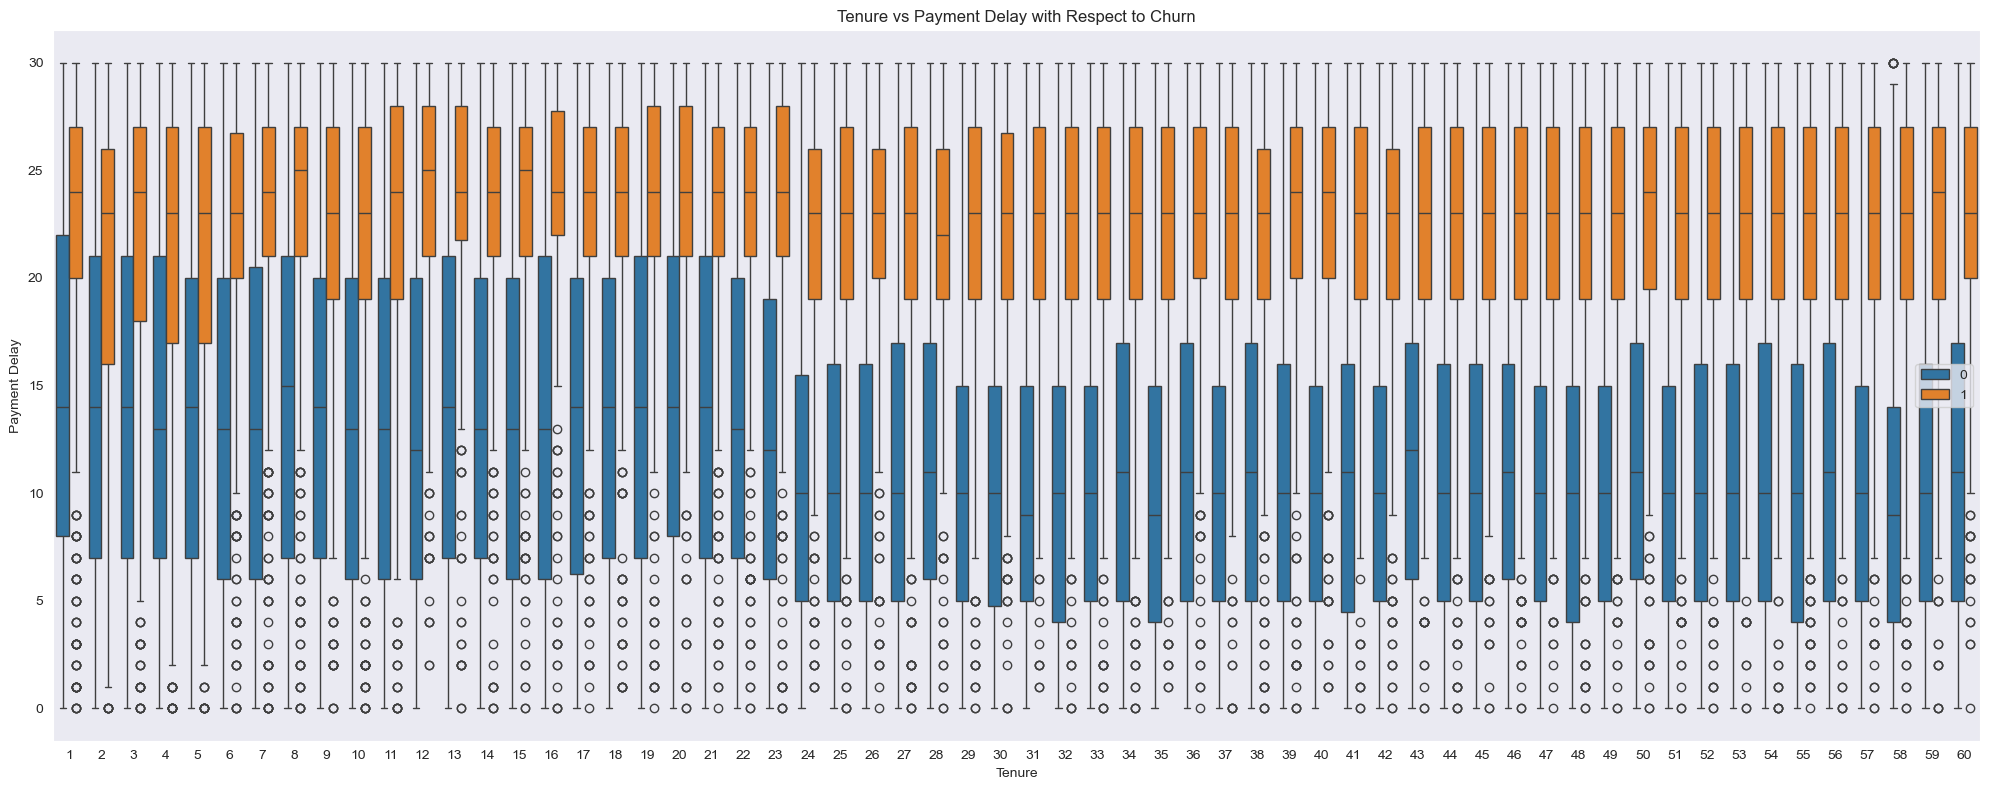

In [58]:
plt.figure(figsize=(20, 8))
sns.boxplot(x="Tenure", y="Payment Delay", hue="Churn", data=df_small)

plt.title("Tenure vs Payment Delay with Respect to Churn")
plt.xlabel("Tenure")
plt.ylabel("Payment Delay")
plt.legend()
plt.tight_layout()
plt.show()

From this visual, it does seem that there are no major differences between the median of Tenure 
who are active and those who are not based on payment delay.



In [61]:
print(df_small.columns)


Index(['Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls',
       'Payment Delay', 'Subscription Type', 'Contract Length', 'Total Spend',
       'Last Interaction', 'Churn'],
      dtype='object')


#### 2.3.1.3 Usage Frequency, Contract Length, Last Interaction, Support Calls

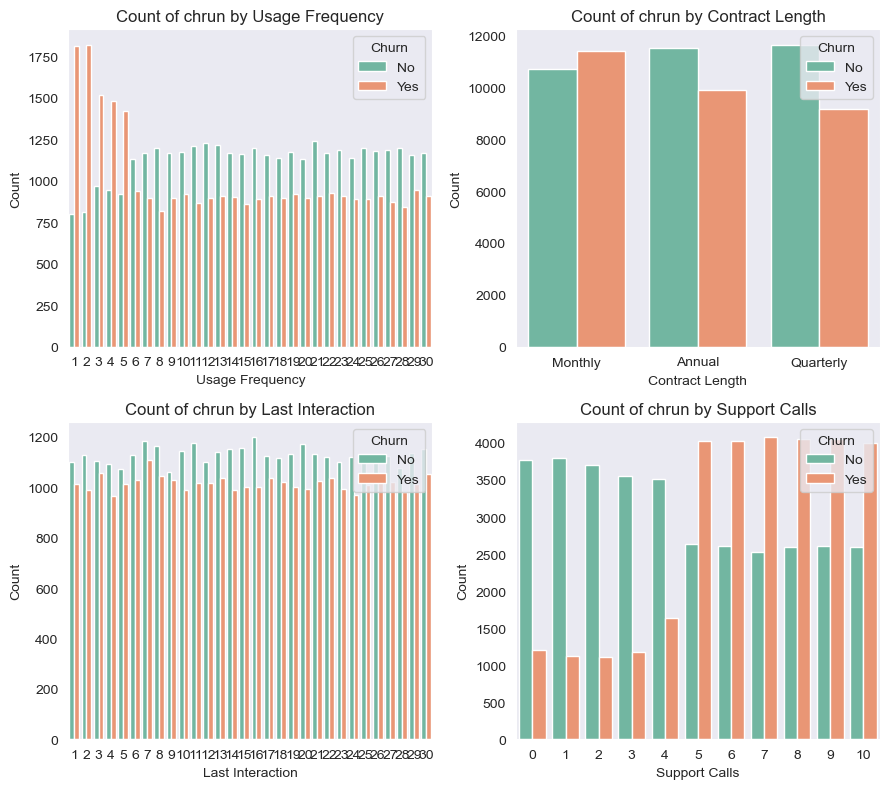

In [64]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 8))
categories = ["Usage Frequency", "Contract Length", "Last Interaction", "Support Calls"]

for ax, category in zip(axes.flatten(), categories):
    sns.countplot(x=category, hue="Churn", data=df_small, palette="Set2", ax=ax)
    ax.set_title(f"Count of chrun by {category.title()}")
    ax.set_xlabel(category.title())
    ax.set_ylabel("Count")
    ax.legend(title="Churn", labels=["No", "Yes"])

plt.tight_layout()
plt.show()


The bar chart shows that while there are differences in subscription types acrossUsage Frequency, Contract Length, Last Interaction, Support Calls but not all have a great information.

In [67]:
def categorical_visualization(col):
    plt.subplot(1,2,1)
    sns.countplot(x=col,data=df_small)
    plt.subplot(1,2,2)
    df_small[col].value_counts().plot(kind='pie',autopct='%0.2f%%')
    plt.tight_layout()
    plt.show()
    
    
def numerical_visualization(col):
    plt.subplot(1,2,1)
    sns.kdeplot(x=col,data=df_small)
    plt.grid()
    plt.subplot(1,2,2)
    sns.boxplot(x=col,data=df_small)
    plt.tight_layout()
    plt.show()

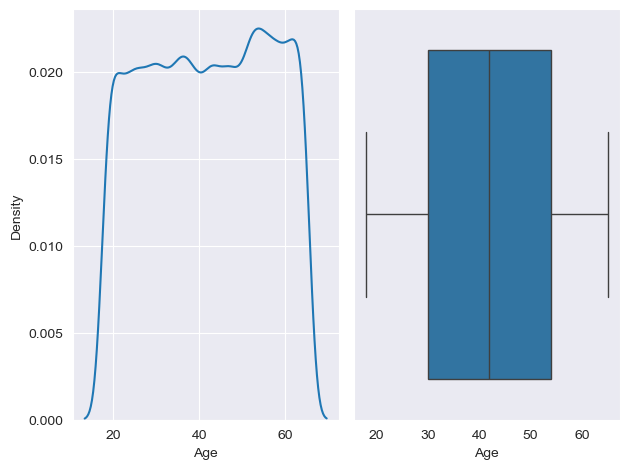

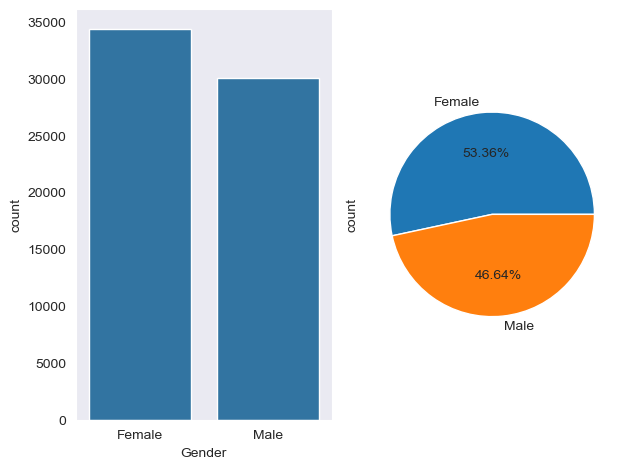

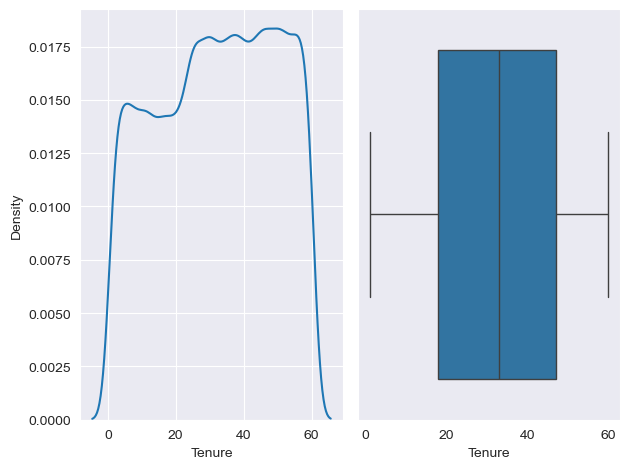

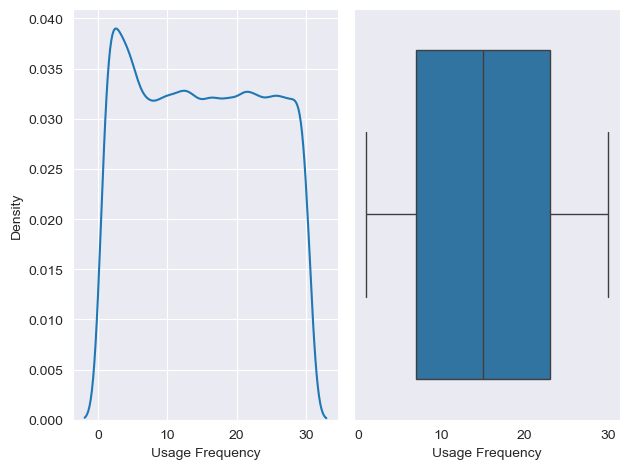

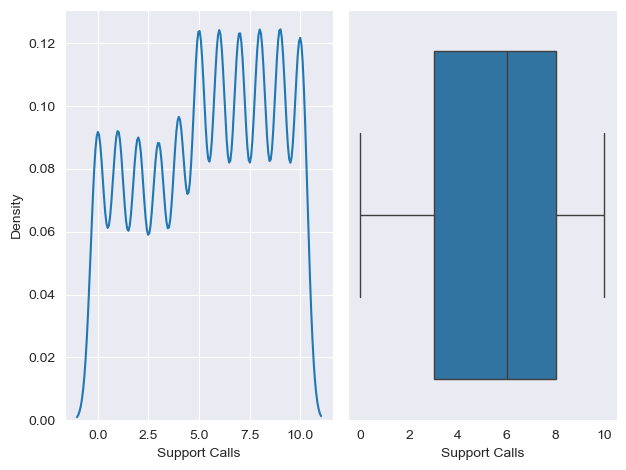

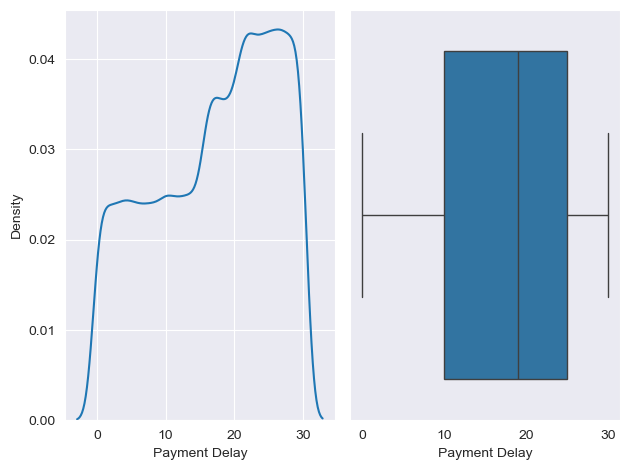

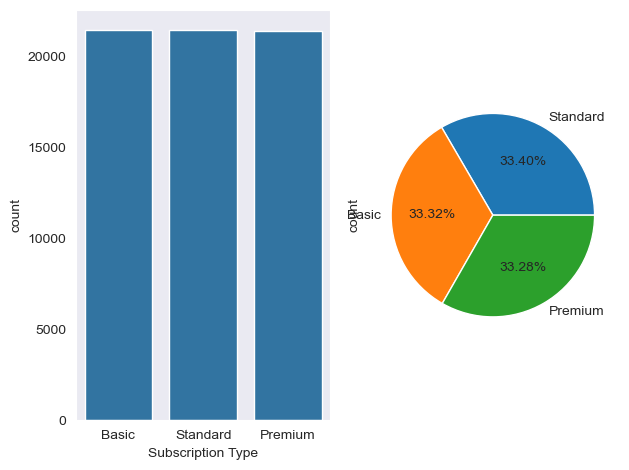

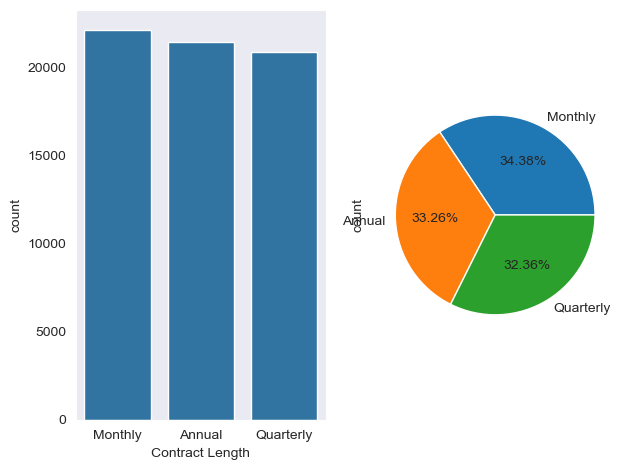

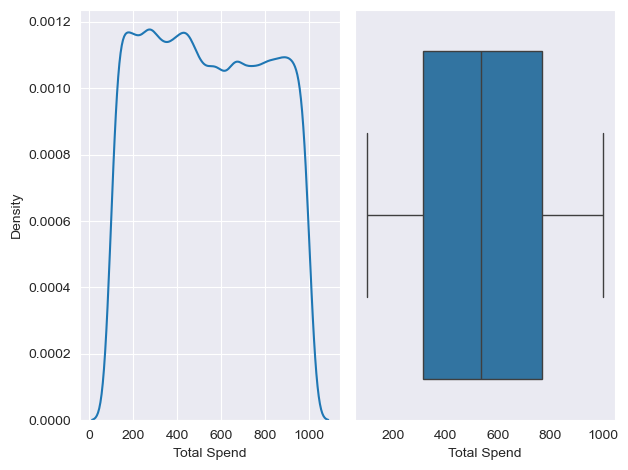

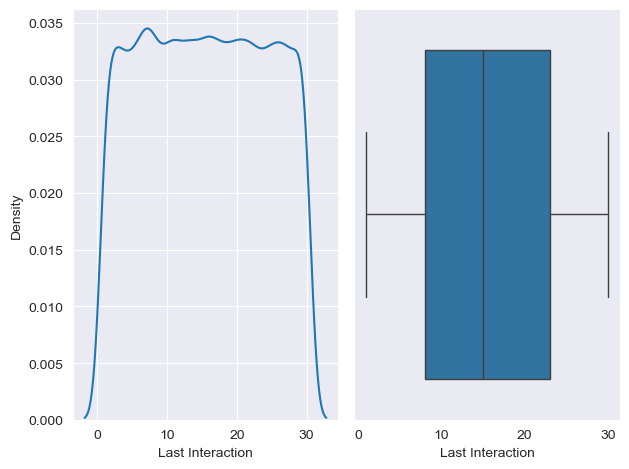

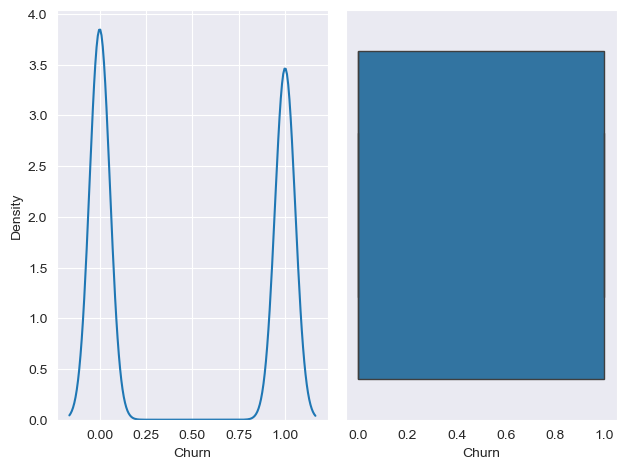

In [69]:
for i in df_small.columns:
    if df_small[i].dtype=='object':
        categorical_visualization(i)
    else:
        numerical_visualization(i)

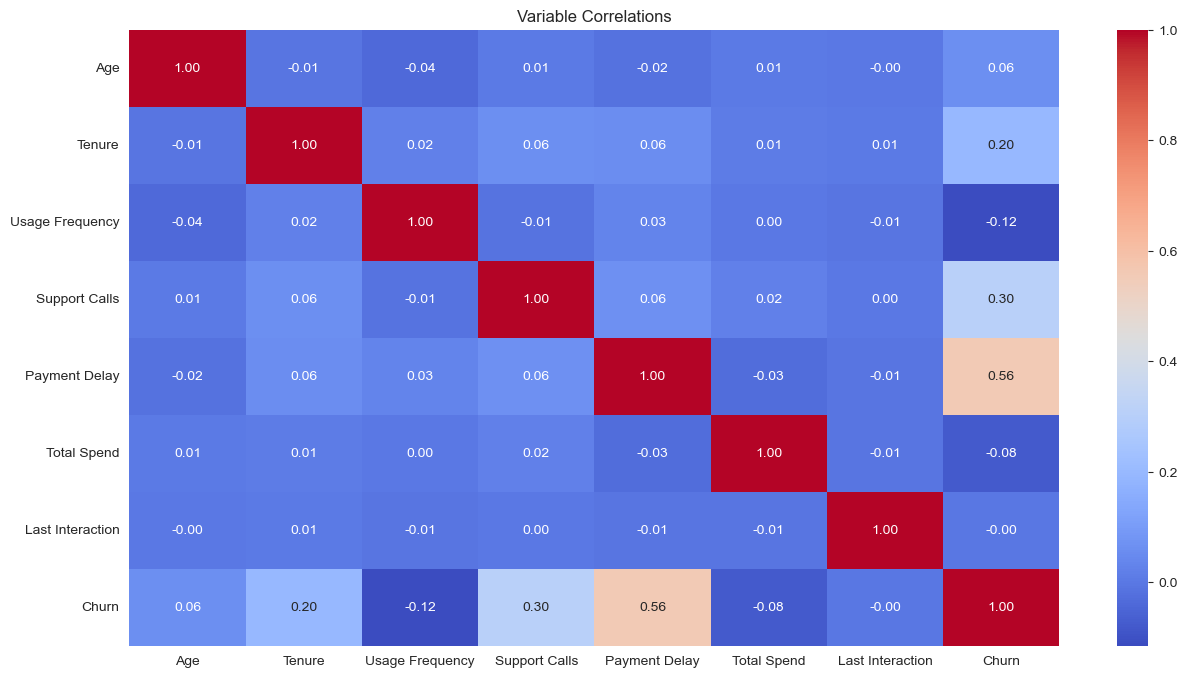

In [75]:
numeric_df = df_small.select_dtypes(include=["int64", "float64"])

plt.figure(figsize=(15,8))
heatmap = sns.heatmap(numeric_df.corr(), annot=True,fmt=".2f", cmap="coolwarm", cbar=True)
heatmap.set_title("Variable Correlations")
plt.show()

#### 2.3.5 Top Feature for customer churn

So, in order yo find out the top features for churn, a model needs to be built. Will continue with model building in next week.

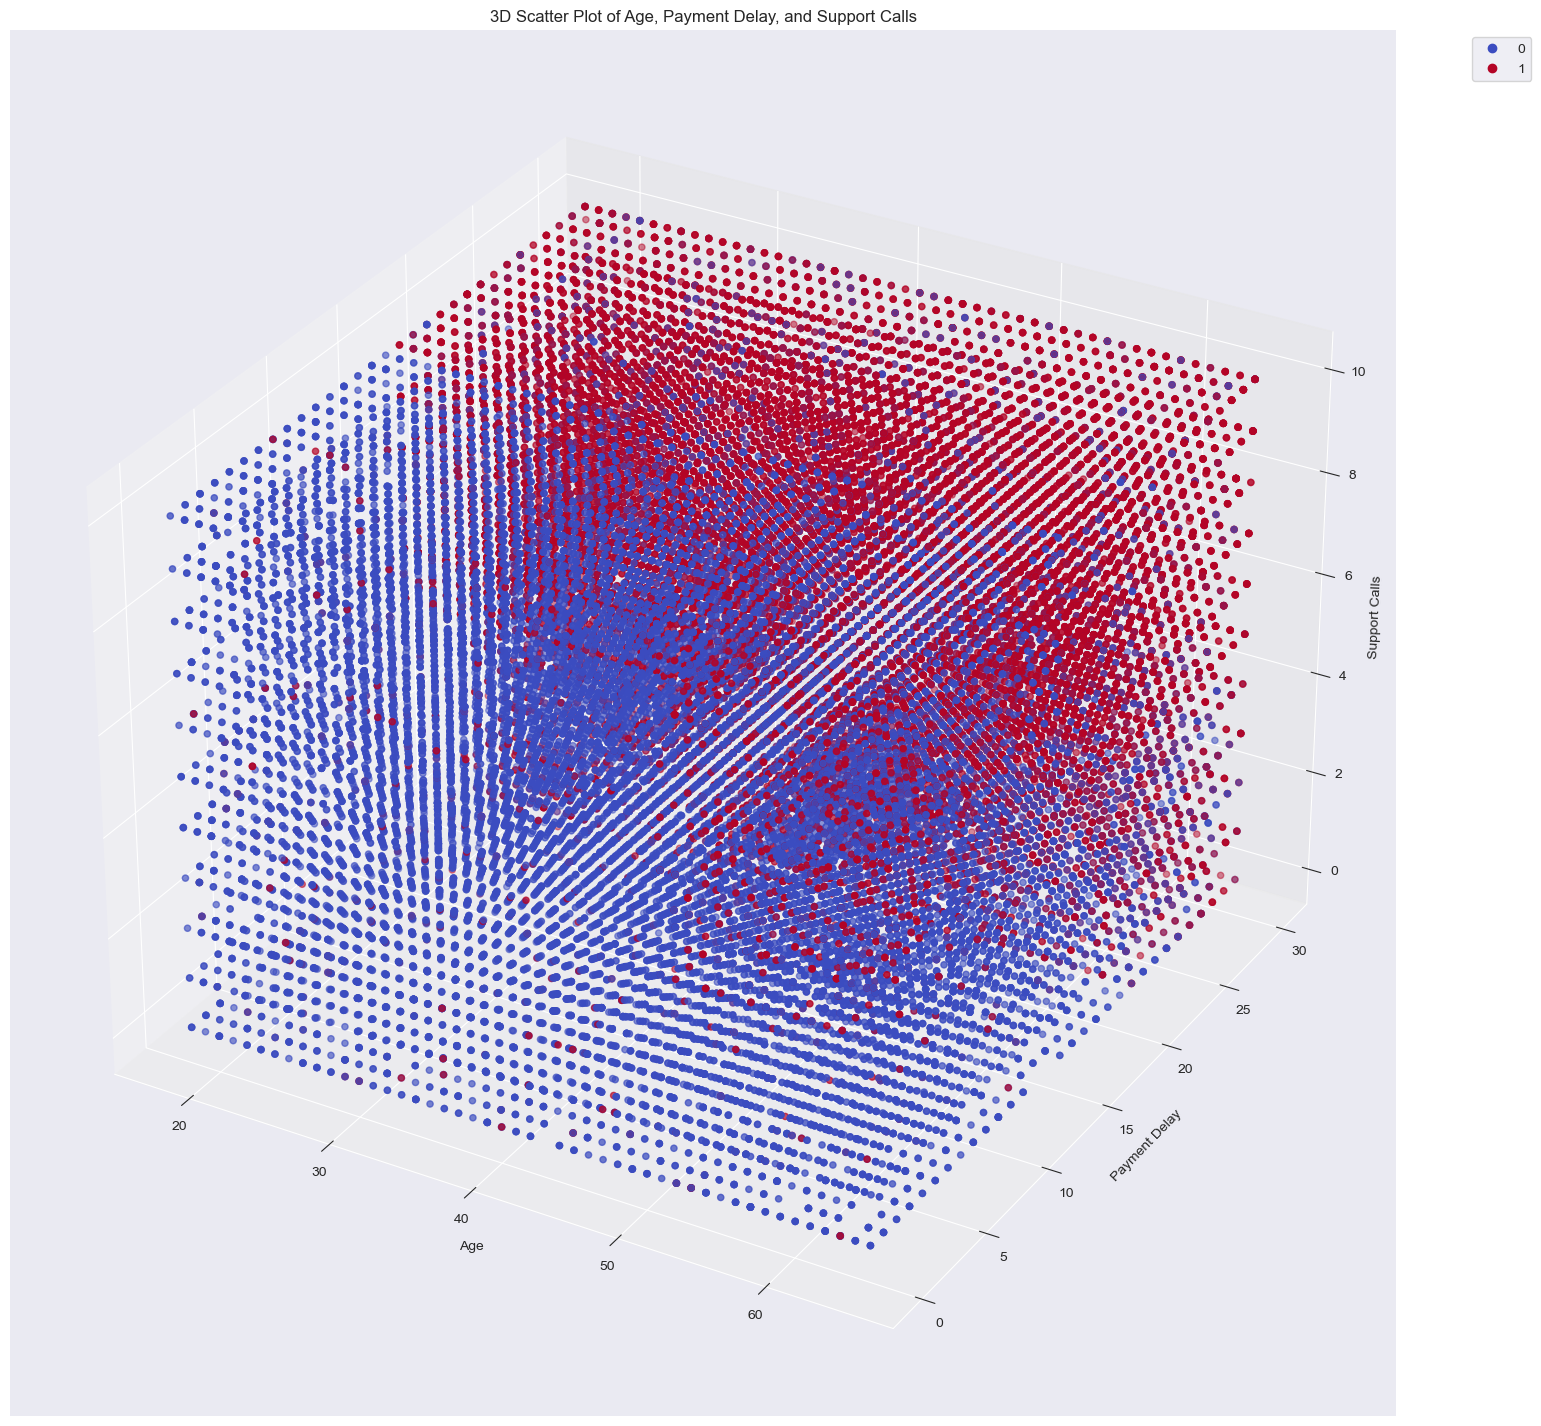

In [79]:
fig = plt.figure(figsize=(18, 18))
ax = fig.add_subplot(111, projection="3d")

sc = ax.scatter(df_small["Age"], df_small["Payment Delay"], df_small["Support Calls"], c=numeric_df["Churn"], cmap="coolwarm")

ax.set_xlabel("Age")
ax.set_ylabel("Payment Delay")
ax.set_zlabel("Support Calls")
plt.title("3D Scatter Plot of Age, Payment Delay, and Support Calls")

plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)
plt.show()


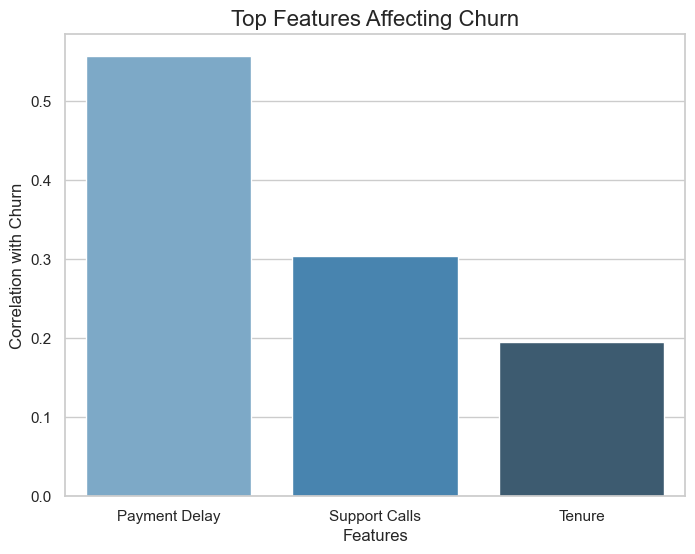

In [81]:

# Dictionary of correlations (top three features affecting churn)
correlation_data = {
    'Features': ['Payment Delay', 'Support Calls', 'Tenure'],
    'Correlation with Churn': [0.557, 0.304, 0.195]
}


df_correlation = pd.DataFrame(correlation_data)

# Set plot style
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Features', y='Correlation with Churn', data=df_correlation, palette="Blues_d")

# Add title and labels
plt.title('Top Features Affecting Churn', fontsize=16)
plt.ylabel('Correlation with Churn', fontsize=12)
plt.xlabel('Features', fontsize=12)

# Show the plot
plt.show()


## **Construct**

### 3.1 Data Processing

In [84]:
df_small

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,53,Female,58,24,9,2,Standard,Annual,533,18,0
...,...,...,...,...,...,...,...,...,...,...,...
64369,45,Female,33,12,6,21,Basic,Quarterly,947,14,1
64370,37,Male,6,1,5,22,Standard,Annual,923,9,1
64371,25,Male,39,14,8,30,Premium,Monthly,327,20,1
64372,50,Female,18,19,7,22,Standard,Monthly,540,13,1


In [86]:
df_small["Gender"] = df_small["Gender"].map({"Male": 1, "Female": 0})

df_small = pd.get_dummies(df_small)


In [88]:
x = df_small.drop(columns=["Churn"])
y = df_small["Churn"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [90]:
df_small

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly
0,22,0,25,14,4,27,598,9,1,True,False,False,False,True,False
1,41,0,28,28,7,13,584,20,0,False,False,True,False,True,False
2,47,1,27,10,2,29,757,21,0,False,True,False,True,False,False
3,35,1,9,12,5,17,232,18,0,False,True,False,False,False,True
4,53,0,58,24,9,2,533,18,0,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64369,45,0,33,12,6,21,947,14,1,True,False,False,False,False,True
64370,37,1,6,1,5,22,923,9,1,False,False,True,True,False,False
64371,25,1,39,14,8,30,327,20,1,False,True,False,False,True,False
64372,50,0,18,19,7,22,540,13,1,False,False,True,False,True,False


In [92]:
# Normalization
scaler = StandardScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

The Age, Total Spend, and Tenure will decide best model overall.

### 3.2 Explore Distinct Model

We will employ 8 distinct machine learning models to determine the most effective approach.

In [96]:
import numpy as np

# Check if there are any NaNs in the array
print(np.isnan(x_train_scaled).any())

# Count the number of NaNs in the array
print(np.sum(np.isnan(x_train_scaled)))


False
0


In [98]:
from sklearn.impute import SimpleImputer

# Create an imputer object with a strategy, such as 'mean'
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform it
x_train_scaled = imputer.fit_transform(x_train_scaled)

# Transform the test data as well
x_test_scaled = imputer.transform(x_test_scaled)


In [100]:
# Drop rows with NaN values
mask = ~np.isnan(x_train_scaled).any(axis=1)
x_train_scaled = x_train_scaled[mask]
y_train = y_train[mask]

# Apply the same mask to the test data
mask_test = ~np.isnan(x_test_scaled).any(axis=1)
x_test_scaled = x_test_scaled[mask_test]
y_test = y_test[mask_test]


In [102]:
# Initialize the models
models = {
    "Logistic Regression": LogisticRegression(random_state=1),
    "Gradient Boost": GradientBoostingClassifier(random_state=1),
    "Random Forest Classifier": RandomForestClassifier(random_state=1),
    "Decision Tree Classifier": DecisionTreeClassifier(random_state=1),
    "SVM": SVC(random_state=1),
    "KNN": KNeighborsClassifier(),
    "XGB Classifier": XGBClassifier(random_state=1),
    "LGBM Classifier": LGBMClassifier(verbose=-1, random_state=1)

}

# Loop through the models dictionary
for name, model in models.items():
    model.fit(x_train_scaled, y_train)

# Start predict
accuracy_scores = {}

for name, model in models.items():
    y_pred = model.predict(x_test_scaled)
    accuracy_scores[name] = accuracy_score(y_test, y_pred)

# Print accuracy scores
for name, score in accuracy_scores.items():
    print(f"The accuracy score for {name} is: {score}")

The accuracy score for Logistic Regression is: 0.8278834951456311
The accuracy score for Gradient Boost is: 0.9968932038834951
The accuracy score for Random Forest Classifier is: 0.9992233009708738
The accuracy score for Decision Tree Classifier is: 0.999378640776699
The accuracy score for SVM is: 0.9329708737864078
The accuracy score for KNN is: 0.9085825242718446
The accuracy score for XGB Classifier is: 0.9999223300970874
The accuracy score for LGBM Classifier is: 0.9998446601941747


#### 3.3 Model Evaluation

In [105]:
for name, model in models.items():
    y_pred = model.predict(x_test_scaled)

    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(x_test_scaled)[:, 1]
        auc_roc = roc_auc_score(y_test, y_proba)
    else:
        auc_roc = None
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    
    if auc_roc is not None:
        print(f"AUC-ROC: {auc_roc:.4f}")
    print("\n")


Model: Logistic Regression
Accuracy: 0.8279
Precision: 0.8152
Recall: 0.8250
F1 Score: 0.8201
AUC-ROC: 0.9051


Model: Gradient Boost
Accuracy: 0.9969
Precision: 0.9977
Recall: 0.9958
F1 Score: 0.9967
AUC-ROC: 0.9999


Model: Random Forest Classifier
Accuracy: 0.9992
Precision: 0.9995
Recall: 0.9989
F1 Score: 0.9992
AUC-ROC: 1.0000


Model: Decision Tree Classifier
Accuracy: 0.9994
Precision: 0.9993
Recall: 0.9993
F1 Score: 0.9993
AUC-ROC: 0.9994


Model: SVM
Accuracy: 0.9330
Precision: 0.9143
Recall: 0.9479
F1 Score: 0.9308


Model: KNN
Accuracy: 0.9086
Precision: 0.8774
Recall: 0.9389
F1 Score: 0.9071
AUC-ROC: 0.9676


Model: XGB Classifier
Accuracy: 0.9999
Precision: 1.0000
Recall: 0.9998
F1 Score: 0.9999
AUC-ROC: 1.0000


Model: LGBM Classifier
Accuracy: 0.9998
Precision: 0.9998
Recall: 0.9998
F1 Score: 0.9998
AUC-ROC: 1.0000




**Model Comparison**

By now, we had examined all 8 models, including their score and accuracy on adataset. Based on that, we can say:

- Among the models evaluated, the XGB Classifier stands out with the highest accuracy of 0.9999, making it the top performer. It slightly outperforms the LGBM Classifier (0.9998) and the Random Forest Classifier (0.9992) in terms of accuracy.

- The Decision Tree Classifier also performs exceptionally well but falls just behind XGB with an accuracy of 0.9994. The XGB Classifier not only leads in accuracy but also achieves a perfect AUC-ROC score of 1.0000, indicating superior performance in distinguishing between classes. 

Conclusion
- Therefore, based on these metrics, the XGB Classifier is recommended as the most reliable and effective model among those tested.


### 3.5 Hyperparameter Turning

In [109]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter grid for XGBClassifier
param_dist_xgb = {
    "n_estimators": randint(100, 200),
    "max_depth": randint(3, 10),
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "subsample": [0.8, 0.9, 1.0]
}

# Initialize the XGBClassifier
xgb_for_tuning = XGBClassifier(random_state=42)

# Set up RandomizedSearchCV with XGBClassifier
rand_search_xgb = RandomizedSearchCV(
    xgb_for_tuning,
    param_distributions=param_dist_xgb,
    n_iter=10,
    cv=5,
    random_state=42
)

# Fit the model
rand_search_xgb.fit(x_train_scaled, y_train)

# Get the best estimator
best_xgb = rand_search_xgb.best_estimator_
best_xgb


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=141, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [121]:
# Train model using best parameters for XGBoost
best_xgb_model = XGBClassifier(max_depth=21, n_estimators=129, random_state=1)
best_xgb_model.fit(x_train_scaled, y_train)
x_test_scaled = scaler.transform(x_test)
y_pred_best_xgb = best_xgb_model.predict(x_test_scaled)
accuracy_best_xgb = accuracy_score(y_test, y_pred_best_xgb)
accuracy_best_xgb


0.9998446601941747

### 3.6 Model Evaluation

#### 3.6.1 Confusion Matrix

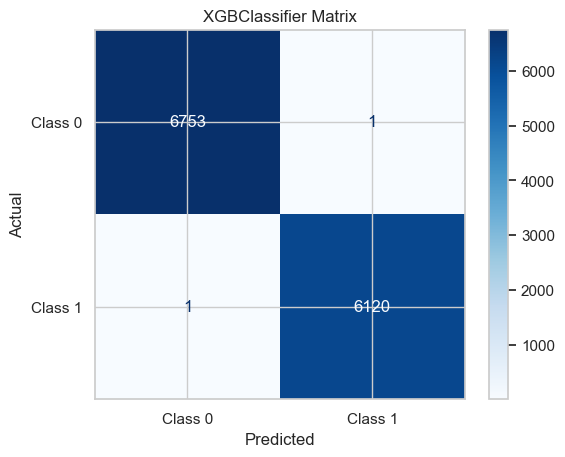

In [123]:
# Generate confusion matrix for XGBoost
y_pred_xgb_cm = best_xgb_model.predict(x_test_scaled)
cm = confusion_matrix(y_test, y_pred_xgb_cm)
cmd = ConfusionMatrixDisplay(cm, display_labels=["Class 0", "Class 1"])

cmd.plot(cmap="Blues")
cmd.ax_.set(title="XGBClassifier Matrix", xlabel="Predicted", ylabel="Actual")
plt.show()


#### 3.6.2 Scores

In [125]:
y_pred_proba_xgb = best_xgb_model.predict_proba(x_test_scaled)
y_pred_xgb = best_xgb_model.predict(x_test_scaled)

# Define a function to get all scores
def get_score(y_true, y_pred_xgb, y_pred_proba_xgb):
    scores_xgb = {}
    scores_xgb["Accuracy"] = accuracy_score(y_true, y_pred_xgb)
    scores_xgb["AUC"] = roc_auc_score(y_true, y_pred_proba_xgb[:, 1])
    scores_xgb["Recall"] = recall_score(y_true, y_pred_xgb)
    scores_xgb["F1"] = f1_score(y_true, y_pred_xgb)
    scores_xgb["Precision"] = precision_score(y_true, y_pred_xgb)
    return scores_xgb

total_score = get_score(y_test, y_pred_xgb, y_pred_proba_xgb)
total_score


{'Accuracy': 0.9998446601941747,
 'AUC': 0.9999999516221504,
 'Recall': 0.9998366280019605,
 'F1': 0.9998366280019605,
 'Precision': 0.9998366280019605}

### 3.7 Best Feature

                   Feature  Importance
0            Payment Delay    0.425802
1                   Gender    0.188315
2  Contract Length_Monthly    0.149087
3            Support Calls    0.102023
4          Usage Frequency    0.035830
5                   Tenure    0.035435
6                      Age    0.033377
7              Total Spend    0.016186
8   Contract Length_Annual    0.007615
9  Subscription Type_Basic    0.003798


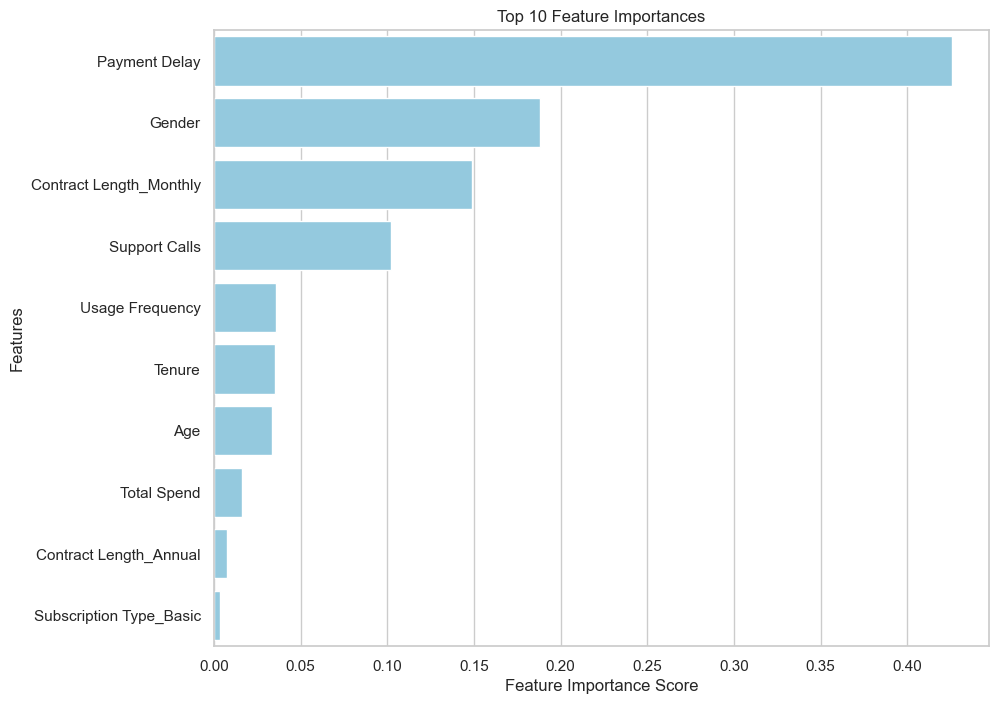

In [129]:
# Get feature importances from the XGBoost model
feature_importances = best_xgb_model.feature_importances_

# Create a DataFrame for features and their importance scores
features_df = pd.DataFrame({
    "Feature": x_train.columns, 
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False).reset_index(drop=True)

# Display the top 10 features
top_10_features = features_df.head(10)
print(top_10_features)

# Plot the top 10 feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x="Importance", y="Feature", data=top_10_features, color="skyblue")

plt.title("Top 10 Feature Importances")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")

plt.show()


## **Execute**

### 4.1 Data Summary

| Model              | Accuracy | Precision | Recall  | F1 Score |
|--------------------|----------|-----------|---------|----------|
| LogisticRegression | 0.8279   | 0.8152    | 0.8250  | 0.8201   |
| Gradient Boost     | 0.9969   | 0.9977    | 0.9958  | 0.9967   |
| Random Forest      | 0.9992   | 0.9995    | 0.9989  | 0.9992   |
| Decision Tree      | 0.9994   | 0.9993    | 0.9993  | 0.9993   |
| SVM                | 0.9330   | 0.9143    | 0.9479  | 0.9308   |
| KNN                | 0.9086   | 0.8774    | 0.9389  | 0.9071   |
| XGB                | 0.9999   | 1.0000    | 0.9998  | 0.9999   |
| LGBM               | 0.9998   | 0.9998    | 0.9998  | 0.9998   |


After parameter turning for XGB Classifier:

| Metric     | Score           |
|------------|-----------------|
| Accuracy   | 0.9999          |
| Precision  | 1.0000          |
| Recall     | 0.9998          |
| F1 Score   | 0.9999          |


### 4.2 Recommendation

**Focus on Payment Delay**

Allocate more resources to resolving payment delays, as models like XGB Classifier, Random Forest, and LGBM consistently show that this is the most influential factor for predicting churn. Use predictive insights to proactively identify customers at risk of delayed payments and implement personalized reminders or flexible payment options to reduce churn.

**Address Support Issues**

Models such as Gradient Boosting and SVM highlight the correlation between support calls and churn. High support call volumes often indicate customer dissatisfaction. Enhance support services and provide faster issue resolution to minimize churn among customers needing frequent assistance.

**Refine Approach Using Model Insights**

Leverage the high accuracy and interpretability of models like Random Forest and Decision Tree to refine your churn prevention strategies. Use feature importance analysis to identify high-risk customers early and develop targeted retention campaigns. These models can help focus marketing efforts on the most critical factors, such as payment behaviors and support experiences, ensuring better resource allocation and improving overall retention.